# Module 8.  Assignment 1. Machine Learning. Bank_term_deposit dataset library sklearn.

This assignment, we have split it into three main parts. First of all, we have clean up and preprocessing the data, analyzed every model individually and after that, we have done a comparative analysis between them. 

Before we start to analyzed any model of classification we want to do some considerations:

For this task, we have paid attention four parameters mainly. Those are Score/accuracy, precision_score, recall_score and failures of model.

We'll plot Learning Curve, it'll shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

We'll create a Confusion matrix, this is a specific table layout that allows visualization of the performance of an algorithm. Each colum of the matrix represents the instances in a predicted class while each row represents the instances in an actual class. it makes it easy to see if the system is confusing several classes. it can happen that you can get a good accuracy and however a bad recall or precision, in other words a bad behaviour between some classes because the model is confusing them. The model works good in general but for some classes in particular not.

### NOTE:Please, first of all, I recommended you read the analysis about stratified and balanced data before continuing (Task 5).





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer

## 1) Describing dataset

In [2]:
bank_Describe = open("C:/DATOS/MASTER BIG DATA/Master Big Data/Modulo 8 Predictive Machine Learning/Task 1/bank/bank-names.txt")
print(bank_Describe.read())

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, GuimarÃ£es, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and SÃ©rgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European

## 2) Loading Bank_term_deposit Data


In [3]:
data_bank = pd.read_csv('C:/DATOS/MASTER BIG DATA/Master Big Data/Modulo 8 Predictive Machine Learning/Task 1/bank/bank.csv'
                        ,delimiter=';',header=0)
data_bank.head()
#data_bank.info

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Cleaning Dataframe and Manipulating

In [41]:
# Shape dataset

data_bank.shape

(4521, 17)

In [4]:
# We see amount classes. (bynary class)
bank_Labels = data_bank.y.value_counts()
bank_Labels

no     4000
yes     521
Name: y, dtype: int64

#### Don't have no-null items.

In [39]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


### Handling Categories Data

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat’

In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.

This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [6]:
# We are going to see the numerical data using df.select_dtypes()
#df.select_dtypes(include=['float64'])

data_bank_num = data_bank.select_dtypes(include=['int64'])
data_bank_num.head(3)

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1


In [7]:
# We are going to see the categorical data using df.select_dtypes()
data_bank_object = data_bank.select_dtypes(include=[object])
data_bank_object.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no


In [8]:
# Now, we are goint to convert categories string colums to arrays numbers.

data_Bank_categories = data_bank.drop(['y'], axis=1)
data_Bank_X = pd.get_dummies(data_Bank_categories, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
data_Bank_X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
# We create a LabelEncoder object and fit it to label Y

label=data_bank[['y']]
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
ple = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data_Bank_Label_Y = label.apply(ple.fit_transform)
data_Bank_Label_Y.head()


,y
0,0
1,0
2,0
3,0
4,0


In [10]:
# how is 'label' mapped?

print(ple.classes_)

['no' 'yes']


In [11]:
# Now, We create datasets to traint it.

X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)


# 3) Estimators seen in class

## Using KNeighborsClassifier Estimator with StratifiedShuffleSplit

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds.
The folds are made by preserving the percentage of samples for each class. Contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets. 

The classifier estimator chosen is the most simple of all, this classifier implementing the k-nearest neighbors vote. This is called KNeighborsClassifier.


In [12]:
X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

Failures = []

# We create both instances.

Bank_term_deposittratified = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=124)

EstimatorKNN = KNeighborsClassifier(n_neighbors=3)

# We applicated split method.

for train_index, test_index in Bank_term_deposittratified.split(X, y):
       
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

        # Now, we have dataset prepared to fit and predict it. For this, we used fit and predict methods.
        EstimatorKNN.fit(X_train, y_train)
        Y_prediction =EstimatorKNN.predict(X_test)

        # We calculate number of failures.
        Failures.append(sum(Y_prediction != y_test))


# Afterthat, We calculate The score.

score_test = EstimatorKNN.score(X_test,y_test)
score_train = EstimatorKNN.score(X_train,y_train)

print('score_train: ', score_train)
print('score_test: ', score_test)

# We could also use metric function.

accs = accuracy_score (Y_prediction, y_test)

print("Accuracy_score:" , accs,'\n')

# Finally, we show several results such as:

print("Num. medio de errores de: "  + str(100*np.mean(Failures)/len(y_test)))    
print("Dev. Std. de errores de: " + str(100*np.std(Failures)/len(y_test))) 
print("Failures: ",Failures,'\n')
print("Bank_term_deposittratified instance: ", Bank_term_deposittratified, '\n')    
print("n_splits: ",Bank_term_deposittratified.get_n_splits(X,y), '\n')

score_train:  0.92414664981
score_test:  0.865143699337
Accuracy_score: 0.865143699337 

Num. medio de errores de: 13.2645541636
Dev. Std. de errores de: 0.216943278465
Failures:  [181, 176, 183] 

Bank_term_deposittratified instance:  StratifiedShuffleSplit(n_splits=3, random_state=124, test_size=0.3,
            train_size=None) 

n_splits:  3 



##  Learning Curves KNeighborsClassifier Estimator with StratifiedShuffleSplit

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.


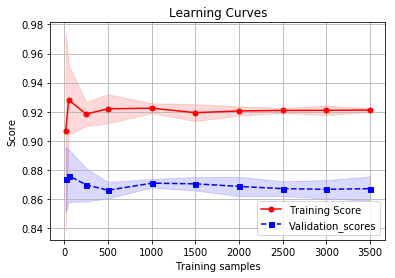

Training samples:  [  15   50  250  500 1000 1500 2000 2500 3000 3500]
Training_Scores:  [ 0.90666667  0.928       0.9184      0.922       0.9224      0.91933333
  0.9205      0.92088     0.92093333  0.92114286]
Validation_scores:  [ 0.87348922  0.8759204   0.86971838  0.86595756  0.87082433  0.87038112
  0.86861047  0.86706449  0.86662274  0.86706327]


In [13]:
EstimatorKNN = KNeighborsClassifier(n_neighbors=3)

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    EstimatorKNN,  X ,  y , shuffle = True, random_state = 42,  
        train_sizes = [15,50,250,500,1000,1500,2000,2500,3000,3500],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_SSS = np.mean(valid_scores, axis=1)
valid_std_SSS = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_SSS, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_scores')
plt.fill_between(train_sizes, valid_mean_SSS + valid_std_SSS, 
                 valid_mean_SSS - valid_std_SSS, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()

print('Training samples: ' ,train_sizes)
print('Training_Scores: ',train_mean)
print('Validation_scores: ',valid_mean_SSS)

In this graph, we can see that adding more samples don't help to get a high score. We must try to add new attributes or we try another algorithm.

In [14]:
# Other types of metrics score: 
# Note: average = 'micro' Calculate metrics globally by counting the total true positives, false negatives and false positives.

print('precision_score: ', precision_score(y_test, Y_prediction, average='micro'))
print('recall_score: ', recall_score(y_test, Y_prediction, average='micro'))

precision_score:  0.865143699337
recall_score:  0.865143699337


#### About Metrics score above:

Precision_score: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Recall_score: The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## Using KNeighborsClassifier Estimator with cross_val_score

By partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.

In [15]:
X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

# Classifier implementing the k-nearest neighbors vote and evaluate a score by cross-validation. You can see that we introduce
# the estimatorKNN as a parameter into cross-validation instance.

EstimatorKNN = KNeighborsClassifier()
CVS_EstimatorKNN= cross_val_score(EstimatorKNN,X,y,cv=10)

# Printing the results:

print('cv scores: ', CVS_EstimatorKNN)

# Now, we calculate the mean of cv scores, and this will be our outcome:

print('Mean: ',np.mean(CVS_EstimatorKNN)) 
print('Std: ',np.std(CVS_EstimatorKNN)) 
print('nº cv: ',CVS_EstimatorKNN.size)



cv scores:  [ 0.8785872   0.87389381  0.86061947  0.87610619  0.87389381  0.88938053
  0.88053097  0.87610619  0.86061947  0.86283186]
Mean:  0.873256949735
Std:  0.00886811565891
nº cv:  10


## Graphic adjustment by K-neighbors

Graphic adjustment of K-neighbors. We use this graph to see where KNeighborsClassifier works better for a give number of n_neighbors.


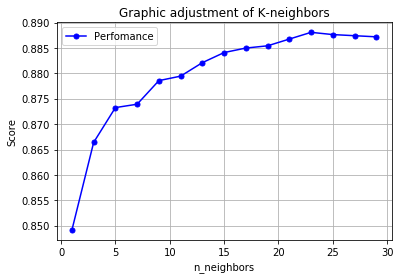

In [16]:
eval_prec_mean =[]
eval_prec_std = []

max_deep_list = list(range(1,30 ,2))

for deep in max_deep_list:
    EstimatorKNN = KNeighborsClassifier(n_neighbors=deep)
    CVS_EstimatorKNN = cross_val_score(EstimatorKNN,X,y,cv=10)
    eval_prec_mean.append(np.mean(CVS_EstimatorKNN))
    eval_prec_std.append(np.std(CVS_EstimatorKNN))
    
plt.plot(max_deep_list, eval_prec_mean, color='b', marker='o', markersize=5, label='Perfomance')
plt.title('Graphic adjustment of K-neighbors')
plt.legend()
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.grid()
plt.show()

eval_prec_mean =[]
eval_prec_std = []

max_deep_list = list(range(1,30,2))

This graph shows us the Score as a function of the number of n_eighbors. We can see that with n_neighbors = 23,
we get higher score value.

## 6) Task: Using KNeighborsClassifier Estimator (weights) with GridSearchCV

Grid searchCV is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. Algorithm parameter tuning is an important step for improving algorithm performance right before presenting results or preparing a system for production.


In [17]:
X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

Bank_term_deposittratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=142)

for train_index, test_index in Bank_term_deposittratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each. 

param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance']}

# we put the param_grid into GridSearchCV and fit it. Notice that the GridSearchCV instance when “fitting” it, all 
# the possible combinations of parameter values are evaluated and the best combination is retained.
# Note: If the estimator is a classifier and y is either multiclass, StratifiedKFold is used.

Grid_S_CV= GridSearchCV(EstimatorKNN,param_grid,cv=10)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator = Grid_S_CV.best_estimator_
Best_Grid_estimator.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

ParameterGrid:  
 [{'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 11, 'weights': 'uniform'}, {'n_neighbors': 11, 'weights': 'distance'}, {'n_neighbors': 13, 'weights': 'uniform'}, {'n_neighbors': 13, 'weights': 'distance'}, {'n_neighbors': 15, 'weights': 'uniform'}, {'n_neighbors': 15, 'weights': 'distance'}] 

Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform') 

Best Score:  0.884126106195
Best Parameters  {'n_neighbors': 15, 'weights': 'uniform'}
Classes  [0 1] 

score_test: 0.890607734807
score_test:  0.890607734807
accuracy_score:  0.890607734807 



##  Learning Curves KNeighborsClassifier Estimator with GridSearchCV

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.


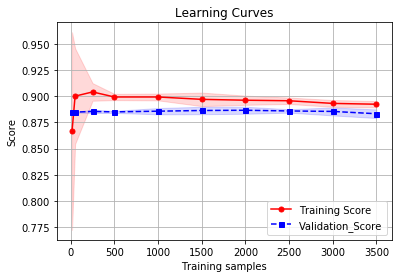

Training samples:  [  15   50  250  500 1000 1500 2000 2500 3000 3500]
Train_Scores:  [ 0.86666667  0.9         0.904       0.8992      0.8992      0.89693333
  0.8961      0.8956      0.89306667  0.89228571]
Valid_scores:  [ 0.88476018  0.88476018  0.8854239   0.88498118  0.88564514  0.88630812
  0.88652838  0.88586589  0.88542341  0.88321053]


In [18]:
Best_Grid_estimator_LC = Best_Grid_estimator

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [15,50,250,500,1000,1500,2000,2500,3000,3500],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_GS = np.mean(valid_scores, axis=1)
valid_std_GS = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_GS, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_GS + valid_std_GS, 
                 valid_mean_GS - valid_std_GS, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_GS)

We notice that exists underfitting (high bias). Therefore, we must add more attributes (no more samples) or we try another more complex algorithm.

In [19]:
# Amount Failures:

y_pred = Best_Grid_estimator.predict(X_test)
print(sum(y_test != y_pred))


99


In [20]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       0.90      0.98      0.94       801
          1       0.58      0.18      0.28       104

avg / total       0.86      0.89      0.86       905



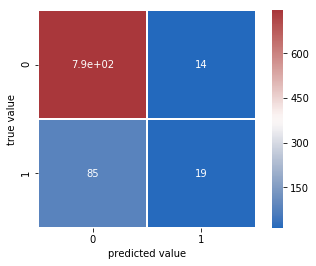

In [21]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');


With the Confusion Matrix we can deepen in detail and we see how is the performance for each class (apart from the precision_score and recall_score metrics). We can see that the worst performance belongs to 'Yes' class with 85 false negatives. it means that, don't predict very well for this class and this class tell us who people will subscribe a term deposit. Therefore, it isn't enough with having a good score but also a good recall. As a solution for this problem, we'll try other estimators or maybe it balances the data too.


## Using decomposition PCA

PCA (Principal component analysis) is a fast and flexible unsupervised method for dimensionality reduction in data, but it can also be useful as a tool for visualization, for noise filtering, or for feature extraction.

In [22]:
X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

# project from 30 to 2 dimensions, fit the model with X and apply the dimensionality reduction on X.

pca = PCA(2) 
projected = pca.fit_transform(X)

# Printing shape.

print(X.shape)
print(projected.shape)

(4521, 51)
(4521, 2)


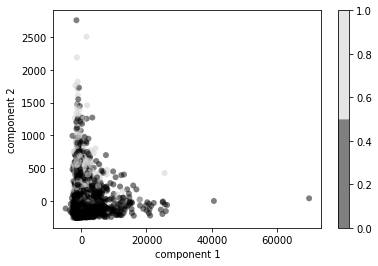

In [23]:
# Plotting components.

plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

We must do some considerations (components mean): The full data is 51-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

In [24]:
# PCA components: Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_.

print('PCA_components: ',pca.components_,'\n')

# Explained_variance: The amount of variance explained by each of the selected components.

print('explained_variance: ',pca.explained_variance_)

PCA_components:  [[  2.94556906e-04   9.99998944e-01  -2.37735296e-05  -1.38746933e-03
   -1.03007352e-05   3.14233814e-04   1.47431671e-05  -2.28688974e-06
   -7.79859767e-06   9.12734594e-07   1.80850279e-06   8.14820726e-06
    5.03632388e-06  -1.35217595e-07  -3.24601715e-06   2.48628345e-07
   -1.71912150e-06  -1.04198695e-06   7.34337381e-08  -3.87260645e-06
    2.77010993e-06   1.10249652e-06  -1.83986115e-07  -1.27207898e-05
    1.16322457e-05   1.27253030e-06   3.02826607e-06  -3.02826607e-06
    8.27232997e-06  -8.27232997e-06   8.53147951e-06  -8.53147951e-06
    3.82525373e-08   2.81884406e-06  -2.85709660e-06   1.68447683e-06
    4.93536377e-07   1.04748738e-06  -5.61733630e-07  -1.61328090e-06
   -1.09190413e-05   5.99379003e-06   7.50365255e-07  -1.08749620e-05
    1.12161120e-05   2.57143829e-06   2.11811754e-07   2.65772965e-06
    8.93385630e-09   1.65949474e-06  -4.32615825e-06]
 [ -4.22992333e-05   1.38593938e-03  -7.92665165e-04   9.99986998e-01
   -8.22668707e-04 

#### Choosing the number of components

Using PCA you can also estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

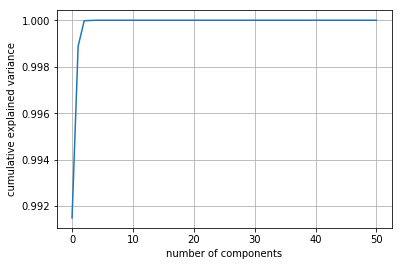

In [25]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

We can see that the first 3 components contain approximately 100 % of cumulative explained variance. therefore with only three componets it would be enough to describe our model.

### Task: DecisionTreeClassifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [26]:
X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

Bank_term_deposittratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=124)

for train_index, test_index in Bank_term_deposittratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
EstimatorKNN = KNeighborsClassifier()

EstimatorDTree= DecisionTreeClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each and fit the model.


tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
Grid_S_CV = GridSearchCV(EstimatorDTree, tree_para, cv=5)
Grid_S_CV.fit(X,y)

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_LOO = Grid_S_CV.best_estimator_
Best_Grid_estimator_LOO.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_LOO.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_LOO.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

ParameterGrid:  
 [{'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 11, 'weights': 'uniform'}, {'n_neighbors': 11, 'weights': 'distance'}, {'n_neighbors': 13, 'weights': 'uniform'}, {'n_neighbors': 13, 'weights': 'distance'}, {'n_neighbors': 15, 'weights': 'uniform'}, {'n_neighbors': 15, 'weights': 'distance'}] 

Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Best Scor

##  Learning Curves Estimator with GridSearchCV ( DecisionTreeClassifier)
Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

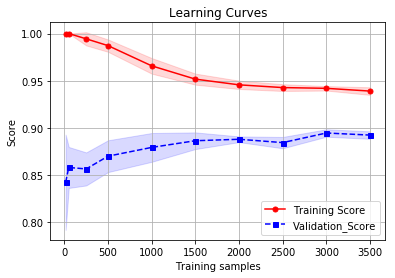

Training samples:  [  15   50  250  500 1000 1500 2000 2500 3000 3500]
Train_Scores:  [ 1.          1.          0.9944      0.9872      0.9658      0.95173333
  0.9457      0.9428      0.942       0.93908571]
Valid_scores:  [ 0.84252726  0.85822471  0.85667408  0.87016843  0.87945754  0.88653303
  0.88807779  0.88453821  0.89471325  0.89250012]


In [27]:
Best_Grid_estimator_LC = Best_Grid_estimator_LOO

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes =[15,50,250,500,1000,1500,2000,2500,3000,3500],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_LOO = np.mean(valid_scores, axis=1)
valid_std_LOO = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_LOO, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_LOO + valid_std_LOO, 
                 valid_mean_LOO - valid_std_LOO, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_LOO)

We notice that exists underfitting (high bias). Therefore, we must add more attributes (no more samples) or we try another more complex algorithm.

In [28]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94       801
          1       0.60      0.26      0.36       104

avg / total       0.87      0.90      0.88       905



In [29]:
# Amount Failures:

y_pred = Best_Grid_estimator_LOO.predict(X_test)
print(sum(y_test != y_pred))

95


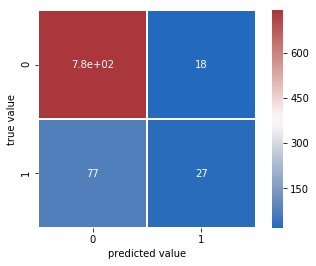

In [30]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

### 5) Task: Razona si es necesario estratificar el proceso de cross-validación analizando la distribución de muestras por clase.

To analyze if our data are stratified, we’ll use the absolute frequency and the number of classes (For this case, we have two classes No and Yes).

We have created two graphics. A bar graph where you can see absolute frequency by each class. And another show us absolute frequency as a function of the number of samples of the dataset for each class.

As you can observe on the second graph, the distribution of absolute frequency isn't the same to the number of samples between classes. Consequently, we can conclude that we need to stratify the data.

Another important question that we must know when we work with models of classification is if our dataset is balanced or not. We can say that a dataset isn’t balanced when the number of observations isn’t the same for each class or when the difference between the number of observations between classes is high.

To know if our dataset is balanced or not. We look at the bar chart, and we observe that absolute frequency for each class isn't the same. Therefore, We can conclude that our dataset isn't balanced.

For our model works well we should do some changes in the data before:

1. Balance the data.
2. Stratification using, for example, Stratified K-Folds cross-validator, Stratified ShuffleSplit cross-validator,          etc.


You can see all this below.



Absolute frequency: [4000  521]


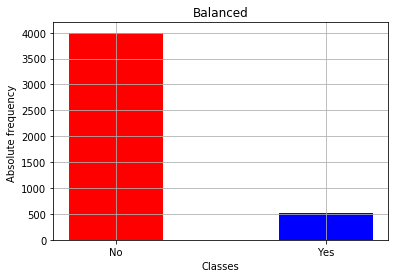

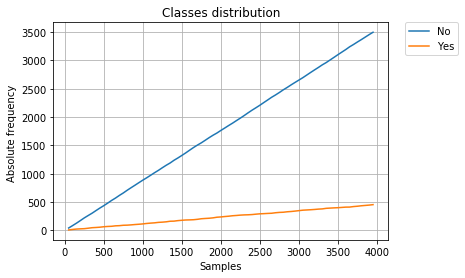

In [31]:

X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

z=[]
h=[]

c=np.bincount(y)  
f=np.arange(50,4000,50)
              
for cont in f:
    b=np.bincount(y[0:cont])
    z.append(np.array(b))
    h.append(np.array(cont)) 
    
g=np.array(z)
k=np.array(h)

'''
print(g[:,0]/k)
print(k)

plt.plot(f,z)
plt.title('Stratified distribution')
plt.xlabel('Samples')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.show()
'''
print('Absolute frequency:',c)
# print('Columns of absolute frecuency by classes and by samples: ','\n',g)

ind = np.arange(2) 

plt.bar(ind,c,color=['red', 'blue'],width=0.45)
plt.xticks(ind, ('No', 'Yes'))
plt.title('Balanced')
plt.xlabel('Classes')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.show()

label1=(g[:,0])
label2=(g[:,1])

plt.plot(f,label1,label='No')
plt.plot(f,label2,label='Yes')
#plt.axis([1,2,0,360])
plt.title('Classes distribution')
plt.xlabel('Samples')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 7) Task : Siguiendo la misma aproximación del último apartado, introduce el tipo de métrica de distancia (parámetro “metric”) dentro del proceso de validación cruzada. Evalúa los resultados y las ganancias/pérdidas de capacidad de generalización del modelo.

In [32]:
X=data_Bank_X.values
y=np.ravel(data_Bank_Label_Y.values)

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

Bank_term_deposittratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=124)

for train_index, test_index in Bank_term_deposittratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each. Now, we included 'metric' in param_grid.

param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric': ['manhattan','chebyshev','minkowski'],
             'p':[3,5]}

# we put the param_grid into GridSearchCV and fit it. Notice that the GridSearchCV instance when “fitting” it, all 
# the possible combinations of parameter values are evaluated and the best combination is retained.
# Note: If the estimator is a classifier and y is either multiclass, StratifiedKFold is used.

Grid_S_CV= GridSearchCV(EstimatorKNN,param_grid,cv=10)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_Metrics = Grid_S_CV.best_estimator_
Best_Grid_estimator_Metrics.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_Metrics.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_Metrics.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

# Lastly, Build a text report showing the main classification metrics.

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=15, p=3,
           weights='uniform') 

Best Score:  0.88689159292
Best Parameters  {'metric': 'manhattan', 'n_neighbors': 15, 'p': 3, 'weights': 'uniform'}
Classes  [0 1] 

score_test: 0.888397790055
score_test:  0.888397790055
accuracy_score:  0.888397790055 

precision_score:  0.888397790055
recall_score:  0.888397790055


### Learning Curve KNeighborsClassifier Estimator (weights-Metrics) with GridSearchCV 

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

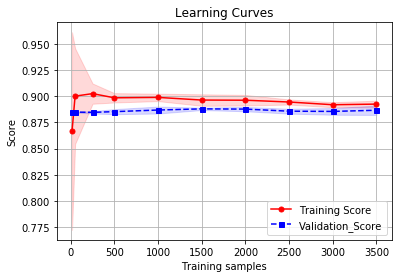

Training samples:  [  15   50  250  500 1000 1500 2000 2500 3000 3500]
Train_Scores:  [ 0.86666667  0.9         0.9024      0.8984      0.8988      0.89626667
  0.8961      0.8944      0.8918      0.8924    ]
Valid_scores:  [ 0.88476018  0.88476018  0.88453919  0.88520315  0.88675109  0.88785679
  0.88763507  0.88564416  0.88542317  0.88652936]


In [33]:
Best_Grid_estimator_LC_M = Best_Grid_estimator_Metrics

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC_M,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [15,50,250,500,1000,1500,2000,2500,3000,3500],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean + valid_std, 
                 valid_mean - valid_std, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()

print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean)

We notice that exists underfitting (high bias). Therefore, we must add more attributes (no more samples) or we try another more complex algorithm.

In [34]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94       801
          1       0.58      0.11      0.18       104

avg / total       0.86      0.89      0.85       905



In [35]:
# Amount Failures:

y_pred = Best_Grid_estimator_Metrics.predict(X_test)
print(sum(y_test != y_pred))


101


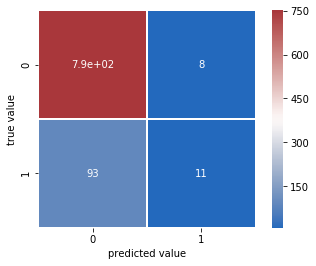

In [36]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Comparative analysis between classifiers

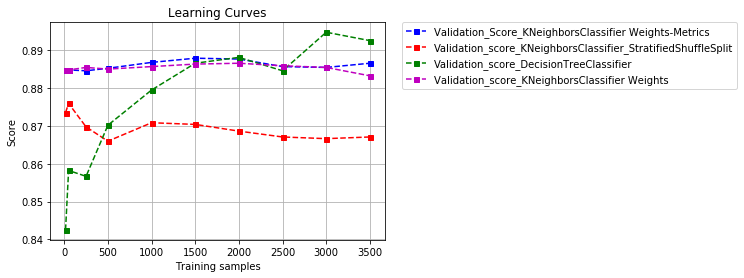

In [38]:
Best_Grid_estimator_LC_M = Best_Grid_estimator_Metrics

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC_M,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [15,50,250,500,1000,1500,2000,2500,3000,3500],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, valid_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score_KNeighborsClassifier Weights-Metrics')
#plt.fill_between(train_sizes, valid_mean + valid_std, 
                 #valid_mean - valid_std, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_SSS, color='r', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier_StratifiedShuffleSplit')
#plt.fill_between(train_sizes, valid_mean_SSS + valid_std_SSS, 
                 #valid_mean_SSS - valid_std_SSS, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_LOO, color='g', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_DecisionTreeClassifier')
#plt.fill_between(train_sizes, valid_mean_LOO + valid_std_LOO, 
                 #valid_mean_LOO - valid_std_LOO, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_GS, color='m', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier Weights')
#plt.fill_between(train_sizes, valid_mean_GS + valid_std_GS, 
                #valid_mean_GS - valid_std_GS, alpha=0.15, color='b')
    
plt.title('Learning Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


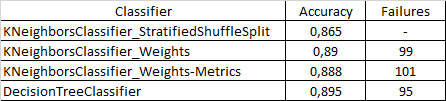

### Final conclusion:

We can see on the graph above that DecisionTreeClasifier has the best performance compared to others as well as the best score. We also see that all algorithms have a high bias.
On the other hand, we can notice that the number of false negatives of the class 'yes' in the matrix confusion is high and this is the class where we are interested in predict.
To improve these results we could do the following:

1.	Balance the data.
2.	We can get new attributes that describe better the function.
3.	We try more complex algorithms.



# Model persistence
Fynally, It is possible to save a model in the scikit by using Python’s built-in persistence model:

Example: joblib.dump(EstimatorKNN, 'TaskModule8.pkl') 

Later you can load back the pickled model (possibly in another Python process) with:  

Example: joblib.load('TaskModule8.pkl') 